# GLM C02 - Count data - Equation citations - Stan

## Josep Fortiana $\mskip100mu$ 2021-05-13

***
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

From [Kleiber and Zeileis 2008, _Applied Econometrics with R,_ Springer-Verlag.](http://www.springer.com/978-0-387-77316-2), and the commpanion package AER.

In [1]:
#install.packages("AER",dependencies=TRUE,repos="https://cloud.r-project.org")
require(AER,quietly=TRUE)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




## Number of Equations and Citations for Evolutionary Biology Publications

### Description

Analysis of citations of evolutionary biology papers published in 1998 in the top three journals   
(as judged by their 5-year impact factors in the Thomson Reuters Journal Citation Reports 2010).

### Usage

`data(EquationCitations)`

### Format

A data frame containing 649 observations on 13 variables.

### Variables

01. `journal`:        Factor. Journal in which the paper was published   
(The American Naturalist, Evolution, Proceedings of the Royal Society of London B: Biological Sciences).
02. `authors`:        Character. Names of authors.
03. `volume`:         Volume in which the paper was published.
04. `startpage`:      Starting page of publication.
05. `pages`:          Number of pages.
06. `equations`:      Number of equations in total.
07. `mainequations`:  Number of equations in main text.
08. `appequations`:   Number of equations in appendix.
09. `cites`:          Number of citations in total.
10. `selfcites`:      Number of citations by the authors themselves.
11. `othercites`:     Number of citations by other authors.
12. `theocites`:      Number of citations by theoretical papers.
13. `nontheocites`:   Number of citations by nontheoretical papers.

### Details

Fawcett and Higginson (2012) investigate the relationship between the number of citations evolutionary biology papers receive, depending on the number of equations per page in the cited paper. 

Overall it can be shown that papers with many mathematical equations significantly lower the number of citations they receive, in particular from nontheoretical papers.

### Source

[Online supplements to Fawcett and Higginson (2012).](http://www.pnas.org/lookup/suppl/doi:10.1073/pnas.1205259109/-/DCSupplemental)

### References

Fawcett, T.W. and Higginson, A.D. (2012). Heavy Use of Equations Impedes Communication among Biologists.   
PNAS – Proceedings of the National Academy of Sciences of the United States of America, 109, 11735–11739. http://dx.doi.org/10.1073/pnas.1205259109

In [2]:
data(EquationCitations)
str(EquationCitations)

'data.frame':	649 obs. of  13 variables:
 $ journal      : Factor w/ 3 levels "AmNat","Evolution",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ authors      : chr  "Prodohl et al." "Mauricio" "Thrall et al." "Watson et al." ...
 $ volume       : int  151 151 151 151 151 151 151 151 151 151 ...
 $ startpage    : int  7 20 29 46 59 68 84 97 116 135 ...
 $ pages        : int  13 9 17 13 9 16 13 19 19 13 ...
 $ equations    : int  0 2 15 7 0 2 3 17 37 0 ...
 $ mainequations: int  0 2 15 7 0 2 3 17 8 0 ...
 $ appequations : int  0 0 0 0 0 0 0 0 29 0 ...
 $ cites        : int  37 178 25 127 43 91 12 62 77 17 ...
 $ selfcites    : int  4 5 10 11 8 7 4 4 8 7 ...
 $ othercites   : int  33 173 15 116 35 84 8 58 69 10 ...
 $ theocites    : int  8 19 8 17 5 21 2 36 64 2 ...
 $ nontheocites : int  22 150 6 98 28 61 6 20 4 8 ...


Several models with `othercites` and `theocites` as response are possible (see the help page in the `AER` package) and the original paper.

Here we choose one of them, with response `othercites` and three predictors, two quantitative and one qualitative.

In [3]:
EqCit<-EquationCitations[,c(11,1)]
EqCit<-data.frame(EqCit,Lpag=log(EquationCitations$pages),EqPag=EquationCitations$equations/EquationCitations$pages)
str(EqCit)

'data.frame':	649 obs. of  4 variables:
 $ othercites: int  33 173 15 116 35 84 8 58 69 10 ...
 $ journal   : Factor w/ 3 levels "AmNat","Evolution",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lpag      : num  2.56 2.2 2.83 2.56 2.2 ...
 $ EqPag     : num  0 0.222 0.882 0.538 0 ...


In [4]:
Cites<-EqCit$othercites
str(Cites)
summary(Cites)

 int [1:649] 33 173 15 116 35 84 8 58 69 10 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    15.0    30.0    44.8    54.0   374.0 

In [5]:
Tcites<-tabulate(Cites+1)
sum(Tcites)
fcites<-Tcites/sum(Tcites)
Tf<-rbind(Count=0:max(Cites),Freq=Tcites,"Rel.freq. f"=round(fcites,3))
Tf

[1] 649

Count,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,...,365,366,367,368,369,370,371,372,373,374.000
Freq,2.000,7.000,10.000,6.000,8.000,9.000,9.000,12.000,11.000,11.000,...,0,0,0,0,0,0,0,0,0,1.000
Rel.freq. f,0.003,0.011,0.015,0.009,0.012,0.014,0.014,0.018,0.017,0.017,...,0,0,0,0,0,0,0,0,0,0.002


In [6]:
# There are few observations (12 actually) above 220. 
# This is a reasonable cut-point for the next plot.
Tcites<-tabulate(Cites+1)
sum(Tcites)
which(Tcites<1)
Tcites0<-Tcites[which(Tcites>1)]
Tcites0
sum(Tcites[1:221])

[1] 649

[1]  74  83  96  97 103 104 108 109 111 116 118 120 121 123 125 126 129 130
 [19] 132 133 135 136 137 138 139 145 146 147 148 149 150 151 153 155 156 157
 [37] 159 161 163 164 166 167 168 169 170 171 173 175 176 177 178 179 180 181
 [55] 182 183 184 186 187 188 190 191 192 193 194 195 196 197 198 199 200 201
 [73] 202 203 204 205 207 208 209 210 211 212 213 214 215 217 218 220 221 222
 [91] 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 240 241 242
[109] 243 244 245 246 247 248 249 251 252 253 254 255 256 257 258 259 260 261
[127] 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 278 279 280
[145] 281 282 283 284 286 287 288 289 291 292 293 294 295 296 297 298 300 301
[163] 302 303 304 305 306 307 308 309 310 311 312 313 314 317 318 319 320 321
[181] 322 323 324 325 326 327 328 329 330 331 332 333 335 336 337 338 339 340
[199] 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
[217] 359 360 362 363 364 365 366 367 368 369 370 371 372 373 374

[1]  2  7 10  6  8  9  9 12 11 11 15 11 16 19 12 11 15 12 13  7 11  8 12 13 12
[26]  8  8 14 12  6 11  8  6 10 13  5  7 11  5  5  4  5  6  6  7 11  3  4  7  6
[51]  8  5  4  6  5  4  3  6  5  9  3  3  2  2  2  5  2  7  3  3  2  2  5  3  2
[76]  2  2  3  2  2  2  2  2  2  2  5  2  2  2  2

[1] 637

In [7]:
str(Tcites)
fcites<-Tcites/sum(Tcites)
Tf<-rbind(Count=0:220,Freq=Tcites[1:221],"Rel.freq. f"=round(fcites[1:221],3))
Tf

 int [1:375] 2 7 10 6 8 9 9 12 11 11 ...


Count,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,...,211,212,213,214,215.000,216,217,218.000,219,220
Freq,2.000,7.000,10.000,6.000,8.000,9.000,9.000,12.000,11.000,11.000,...,0,0,0,0,1.000,0,0,1.000,0,0
Rel.freq. f,0.003,0.011,0.015,0.009,0.012,0.014,0.014,0.018,0.017,0.017,...,0,0,0,0,0.002,0,0,0.002,0,0


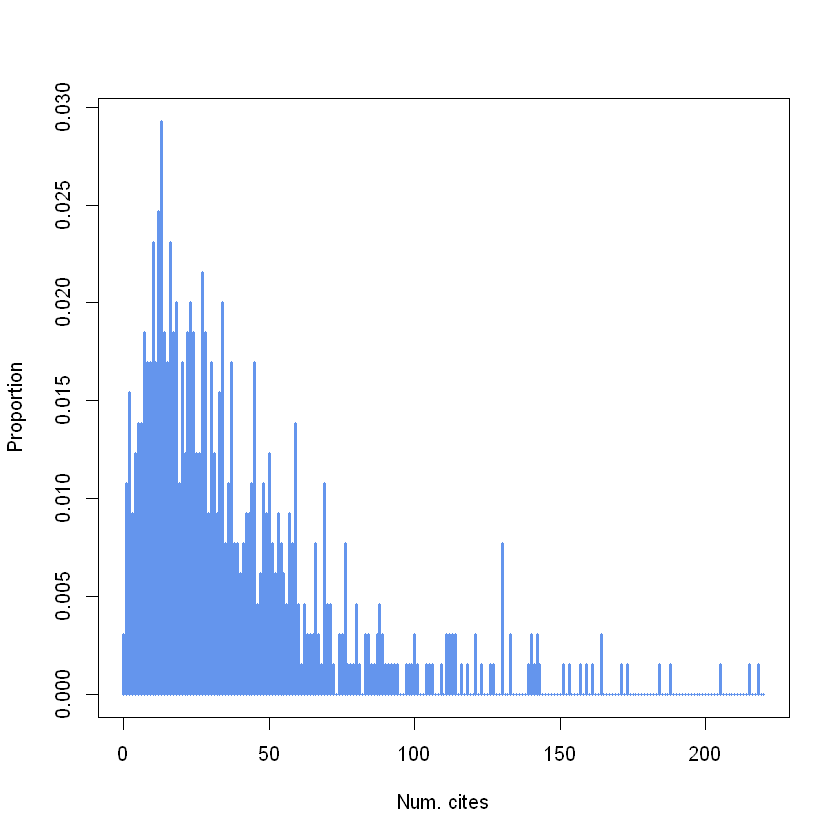

In [8]:
options(repr.plot.width=7,repr.plot.height=7)
matplot(x=0:220,y=fcites[1:221],type="h",col="CornflowerBlue",lwd=2.5,
       xlab="Num. cites", ylab="Proportion")

In [9]:
round(mean(Cites),3)
round(var(Cites),3)
round(var(Cites)/mean(Cites),3)

[1] 44.795

[1] 2540.734

[1] 56.719

The expectation and variance of  $Y\sim\negbindist(r,p)$ are:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p},\mskip50mu\operatorname{var}(Y)=\dfrac{r\cdot (1-p)}{p^{2}}.
$$



An alternative parameterization is to use $(\mu,\theta)$ instead of $(p,r)$ where $\mu=\operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p}$  and $\theta=r$.

With this parameterization:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\mu,\mskip50mu\operatorname{var}(Y)=\mu+\dfrac{\mu^{2}}{\theta}.
$$

A rough estimate of the $\theta$ parameter in a Negative Binomial is:

$$
    v\equiv\var(Y)=\mu+\dfrac{\mu^{2}}{\theta}=\mu\cdot\left(1+\dfrac{\mu}{\theta}\right),
    \mskip40mu \hat{\theta}=\dfrac{\mu}{v/\mu-1}.
$$

In this case:

In [10]:
theta.hat<-mean(Cites)/(var(Cites)/mean(Cites)-1)
round(theta.hat,3)

[1] 0.804

#### Predictors description

In [11]:
summary(EqCit)

   othercites         journal         Lpag            EqPag       
 Min.   :  0.0   AmNat    :121   Min.   :0.6931   Min.   :0.0000  
 1st Qu.: 15.0   Evolution:186   1st Qu.:1.7918   1st Qu.:0.0000  
 Median : 30.0   ProcB    :342   Median :1.9459   Median :0.0000  
 Mean   : 44.8                   Mean   :2.0674   Mean   :0.4317  
 3rd Qu.: 54.0                   3rd Qu.:2.3026   3rd Qu.:0.3750  
 Max.   :374.0                   Max.   :3.2189   Max.   :7.2857  

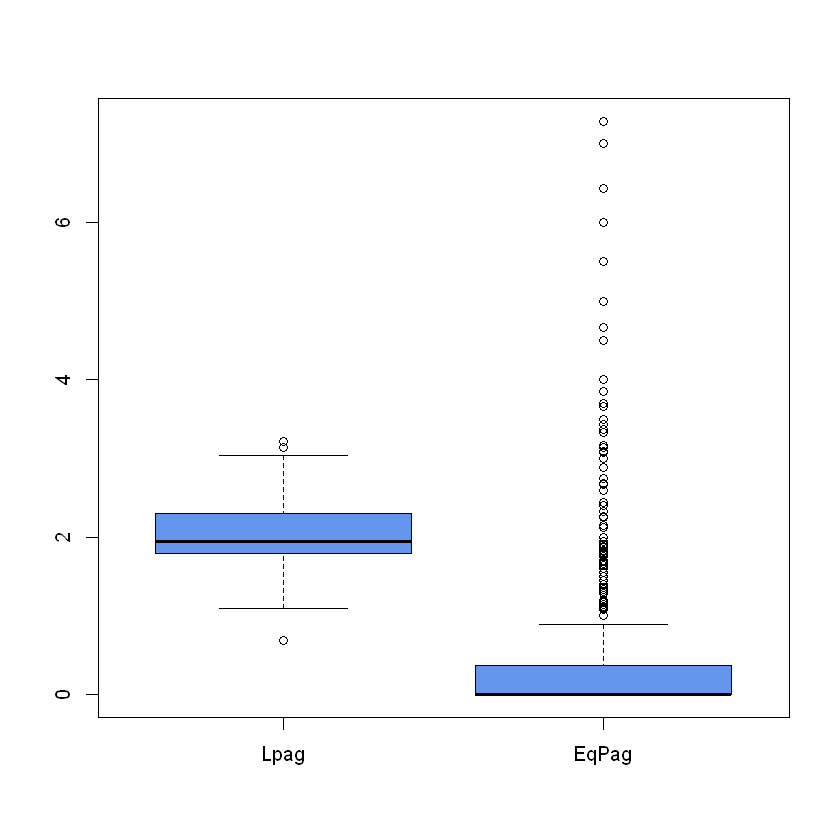

In [12]:
Num.pred<-c(3,4)
options(repr.plot.width=7,repr.plot.height=7)
boxplot(EqCit[,Num.pred],col="CornflowerBlue")

In [13]:
Num.vars<-c(1,3,4)
round(cor(EqCit[,Num.vars]),2)

,othercites,Lpag,EqPag
othercites,1.00,0.16,-0.06
Lpag,0.16,1.00,0.06
EqPag,-0.06,0.06,1.00


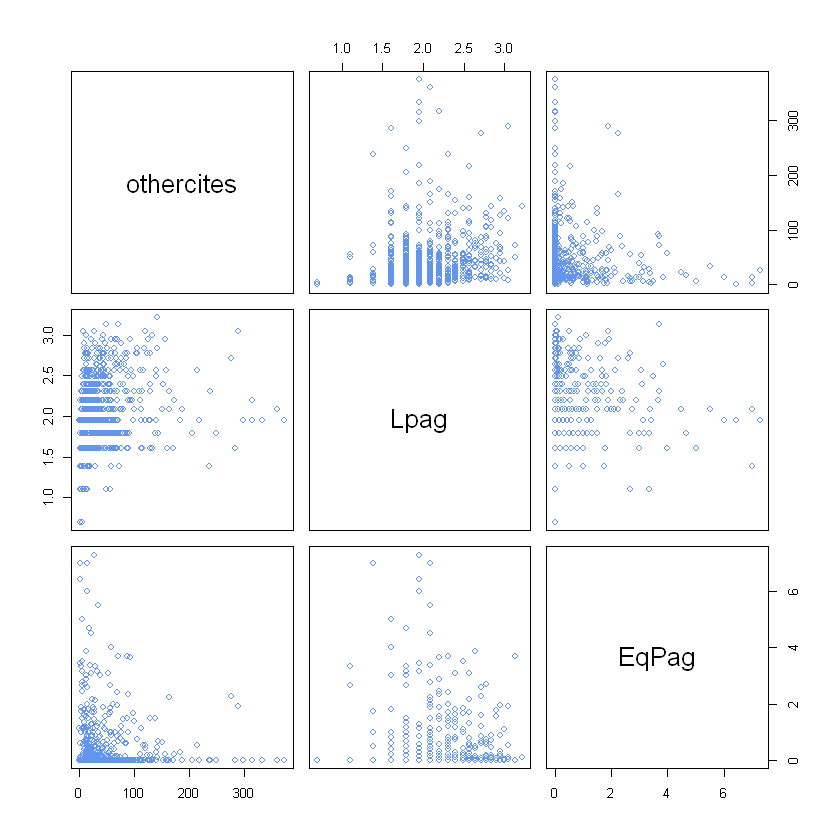

In [14]:
options(repr.plot.width=7,repr.plot.height=7)
pairs(EqCit[,Num.vars],col="CornflowerBlue")

# 01 - Frequentist Poisson regression with `glm`

The default link function for the `poisson`  family is `log()`. That is, the model is

$$
    \log(\mu_{i})=\eta_{i},\mskip40mu \eta_{i}=\beta_{0}+x_{i}\cdot \beta,\mskip40mu 1\leq i\leq n.
$$

In [15]:
EqCit.Poisson.glm.01<-glm(othercites~.,family=poisson,data=EqCit)
summary(EqCit.Poisson.glm.01)


Call:
glm(formula = othercites ~ ., family = poisson, data = EqCit)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.718  -4.734  -2.270   1.321  30.128  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.729497   0.046925  58.167  < 2e-16 ***
journalEvolution -0.113239   0.017523  -6.462 1.03e-10 ***
journalProcB      0.089792   0.018865   4.760 1.94e-06 ***
Lpag              0.521725   0.017882  29.175  < 2e-16 ***
EqPag            -0.099246   0.007164 -13.853  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 25580  on 648  degrees of freedom
Residual deviance: 24329  on 644  degrees of freedom
AIC: 27690

Number of Fisher Scoring iterations: 5


### Considering overdispersion

There is a formal test of overdispersion in the `AER` package. 

This is the companion of the book by Christian Kleiber and Achim Zeileis (2008), _Applied Econometrics with R._ Springer.

In [16]:
dispersiontest(EqCit.Poisson.glm.01)


	Overdispersion test

data:  EqCit.Poisson.glm.01
z = 6.4489, p-value = 5.632e-11
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  54.41636 


### `quasipoisson` family in `glm`

There is a `quasipoisson` family in `glm` to allow for some overdispersion.   
The default link is still `log()`.

The estimation procedure does not require the pdf; only the variance as a function of the mean,   
here it is $v=\mu\cdot \alpha$, where $\alpha$ has to be estimated.
On the flip side, then there is no likelihood and quantities such as `AIC` cannot be computed.

In [17]:
EqCit.Poisson.glm.02<-glm(othercites~.,family=quasipoisson,data=EqCit)
summary(EqCit.Poisson.glm.02)


Call:
glm(formula = othercites ~ ., family = quasipoisson, data = EqCit)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.718  -4.734  -2.270   1.321  30.128  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.72950    0.34749   7.855 1.68e-14 ***
journalEvolution -0.11324    0.12976  -0.873   0.3832    
journalProcB      0.08979    0.13970   0.643   0.5206    
Lpag              0.52172    0.13242   3.940 9.05e-05 ***
EqPag            -0.09925    0.05305  -1.871   0.0618 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 54.83797)

    Null deviance: 25580  on 648  degrees of freedom
Residual deviance: 24329  on 644  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


# 02 - Treating overdispersion with a $\negbindist$ regression

Another possibility is to use a regression model with a $\negbindist$ response.

The `glm()` does not have this possibility, but in the `MASS` package there is a function for this model

In [18]:
require(MASS,quietly=TRUE)

In [19]:
EqCit.NegBin.glm.01<-glm.nb(othercites~.,data=EqCit)
summary(EqCit.NegBin.glm.01)


Call:
glm.nb(formula = othercites ~ ., data = EqCit, init.theta = 1.276461552, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0428  -0.9933  -0.3980   0.2051   3.7786  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.59984    0.26671   9.748  < 2e-16 ***
journalEvolution -0.09104    0.10819  -0.841  0.40008    
journalProcB      0.13023    0.11255   1.157  0.24725    
Lpag              0.57241    0.10400   5.504 3.71e-08 ***
EqPag            -0.10931    0.03652  -2.993  0.00276 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.2765) family taken to be 1)

    Null deviance: 760.87  on 648  degrees of freedom
Residual deviance: 723.03  on 644  degrees of freedom
AIC: 6209.2

Number of Fisher Scoring iterations: 1


              Theta:  1.2765 
          Std. Err.:  0.0671 

 2 x log-likelihood:  -6197.1660 

# 05a - Bayesian Poisson regression with Stan

In [20]:
#install.packages("rstan",dependencies=TRUE,repos= "https://cloud.r-project.org")
options(mc.cores = parallel::detectCores())
require(rstan)
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [21]:
X <- model.matrix(othercites~.,data=EqCit)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:649, 1:4] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:649] "1" "2" "3" "4" ...
  ..$ : chr [1:4] "journalEvolution" "journalProcB" "Lpag" "EqPag"


[1] 649   4

In [22]:
EqCit.Stan.01.model.string<-"
    data{
       // Define variables in data
       int<lower=0>     n;
       int<lower=0>     k;
       matrix[n,k]      X;
       int            y[n]; 
       }
 
    parameters{
        real        b0;
        vector[k]   b;
        }

    transformed parameters{
        vector[n]      eta;          // linear predictor
        vector[n]      mu;
    
        eta = b0+X*b;
        mu  = exp(eta); // Mean
        }
 
    model {
        y ~ poisson(mu); // Likelihood 
        }

"
cat(EqCit.Stan.01.model.string,file="EqCit.Stan.01.stan")

In [23]:
EqCit.Stan.01.data.list<-list(X=X,y=EqCit$othercites,n=n,k=k)

In [24]:
EqCit.Stan.01.model<-stan_model(file="EqCit.Stan.01.stan")

recompiling to avoid crashing R session



### Sampling from the Stan model with MCMC _(HMC-NUTS)_

In [25]:
EqCit.Stan.01.samples<-sampling(EqCit.Stan.01.model, data = EqCit.Stan.01.data.list, 
    chains = 4, iter = 2000, warmup = 400, thin = 1) 

In [26]:
summary(EqCit.Stan.01.samples,par=c("b0","b"),digits=2)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b0,2.72927400,0.0011436336,0.04634527,2.63788124,2.69831051,2.72945770,2.75936371,2.82045021,1642.241,1.0019060
b[1],-0.11339523,0.0003389615,0.01742700,-0.14747411,-0.12565133,-0.11313540,-0.10163909,-0.07891163,2643.287,1.0007919
b[2],0.08973093,0.0004286246,0.01845443,0.05287544,0.07746735,0.08967547,0.10202878,0.12563900,1853.732,1.0013147
b[3],0.52174385,0.0004085937,0.01784233,0.48670928,0.50999173,0.52169646,0.53355797,0.55698476,1906.864,1.0018203
b[4],-0.09927694,0.0000998212,0.00705023,-0.11318351,-0.10405676,-0.09919330,-0.09452694,-0.08547867,4988.397,0.9996775


In [27]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)
color_scheme_set("brightblue")

This is bayesplot version 1.8.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [28]:
EqCit.Stan.01.a<-as.array(EqCit.Stan.01.samples)

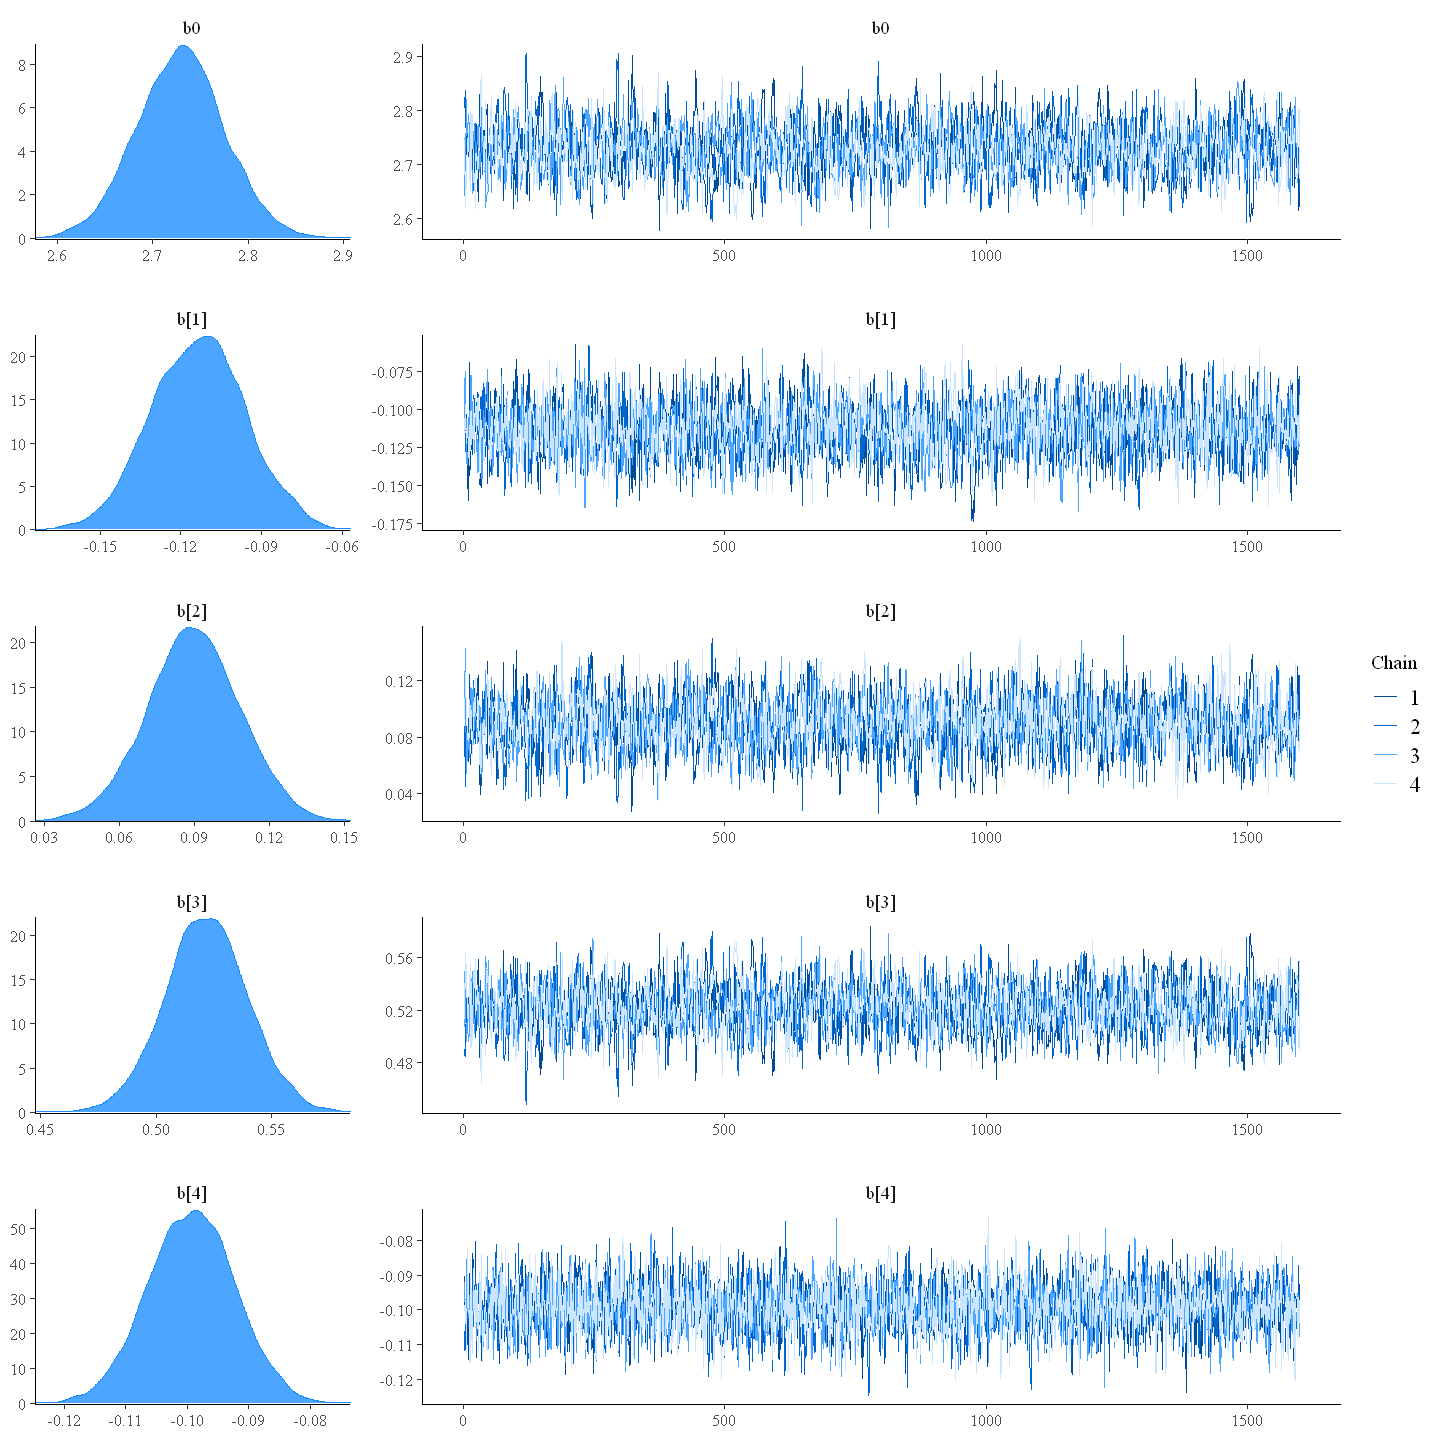

In [30]:
options(repr.plot.width=12,repr.plot.height=12)
mcmc_combo(EqCit.Stan.01.a,pars = vars(contains("b")),widths=c(1,3))

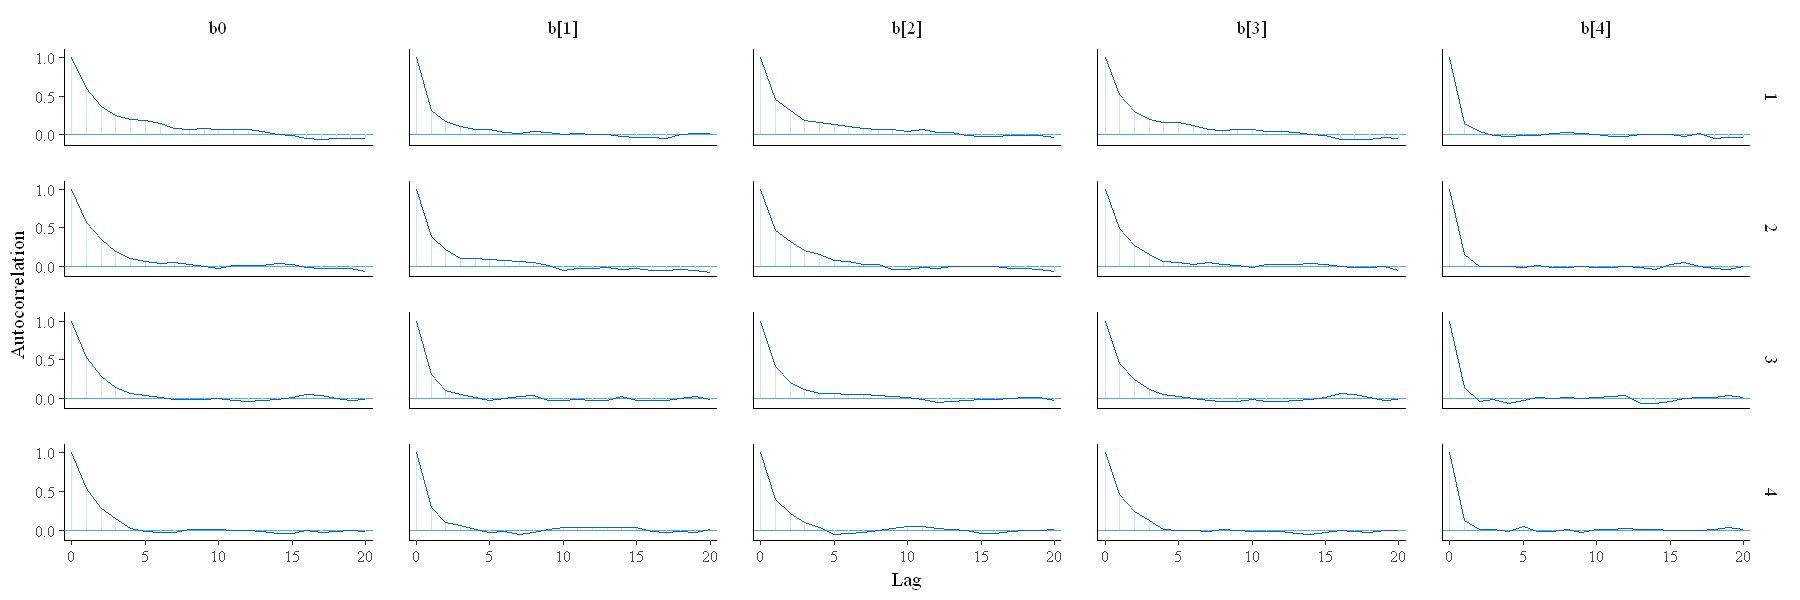

In [31]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(EqCit.Stan.01.a, pars = vars(contains("b")))

# 05b - Negative binomial regression with Stan

In [32]:
#install.packages("rstan",dependencies=TRUE,repos= "https://cloud.r-project.org")
options(mc.cores = parallel::detectCores())
require(rstan)
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')

In [33]:
X <- model.matrix(othercites~.,data=EqCit)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:649, 1:4] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:649] "1" "2" "3" "4" ...
  ..$ : chr [1:4] "journalEvolution" "journalProcB" "Lpag" "EqPag"


[1] 649   4

In [34]:
EqCit.Stan.NB01.model.string<-"
    data{
        int n;
        int k;
        matrix[n,k] X;
        int y[n];
        }
        
    parameters{
        real        b0;
        vector[k]   b;
        real<lower=0, upper=1> p;
        }
        
    transformed parameters{
        vector[n] mu;
        vector[n] alpha ;           
        real beta ;
                                
        
        beta = p/(1-p);
        mu = exp(b0 + X * b);
        alpha = beta * mu ;
        }
        
    model{
        y ~ neg_binomial(alpha, beta);
        }

"
cat(EqCit.Stan.NB01.model.string,file="EqCit.Stan.NB01.stan")

In [35]:
EqCit.Stan.NB01.data.list<-list(X=X,y=EqCit$othercites,n=n,k=k)

In [36]:
EqCit.Stan.NB01.model<-stan_model(file="EqCit.Stan.NB01.stan")

### Sampling from the Stan model with MCMC _(HMC-NUTS)_

In [37]:
EqCit.Stan.NB01.samples<-sampling(EqCit.Stan.NB01.model, data = EqCit.Stan.NB01.data.list, 
    chains = 4, iter = 2000, warmup = 500, thin = 1)

In [38]:
summary(EqCit.Stan.NB01.samples,par=c("b0","b"),digits=2)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b0,2.97824488,0.0048993335,0.21428185,2.5633757,2.83409350,2.98116912,3.12197681,3.40821452,1912.920,1.001538
b[1],-0.08830638,0.0014921252,0.08628600,-0.2587761,-0.14696282,-0.08856884,-0.03085316,0.07837758,3344.030,1.000978
b[2],-0.02834778,0.0017725284,0.08798276,-0.2001805,-0.08761192,-0.02909564,0.03029879,0.14709489,2463.819,1.002154
b[3],0.42722333,0.0017985397,0.08334202,0.2569582,0.37200744,0.42792971,0.48238031,0.58976209,2147.276,1.001287
b[4],-0.09067579,0.0005280496,0.03316181,-0.1595721,-0.11196209,-0.08998606,-0.06801281,-0.02826663,3943.912,1.000105


In [39]:
EqCit.Stan.NB01.a<-as.array(EqCit.Stan.NB01.samples)

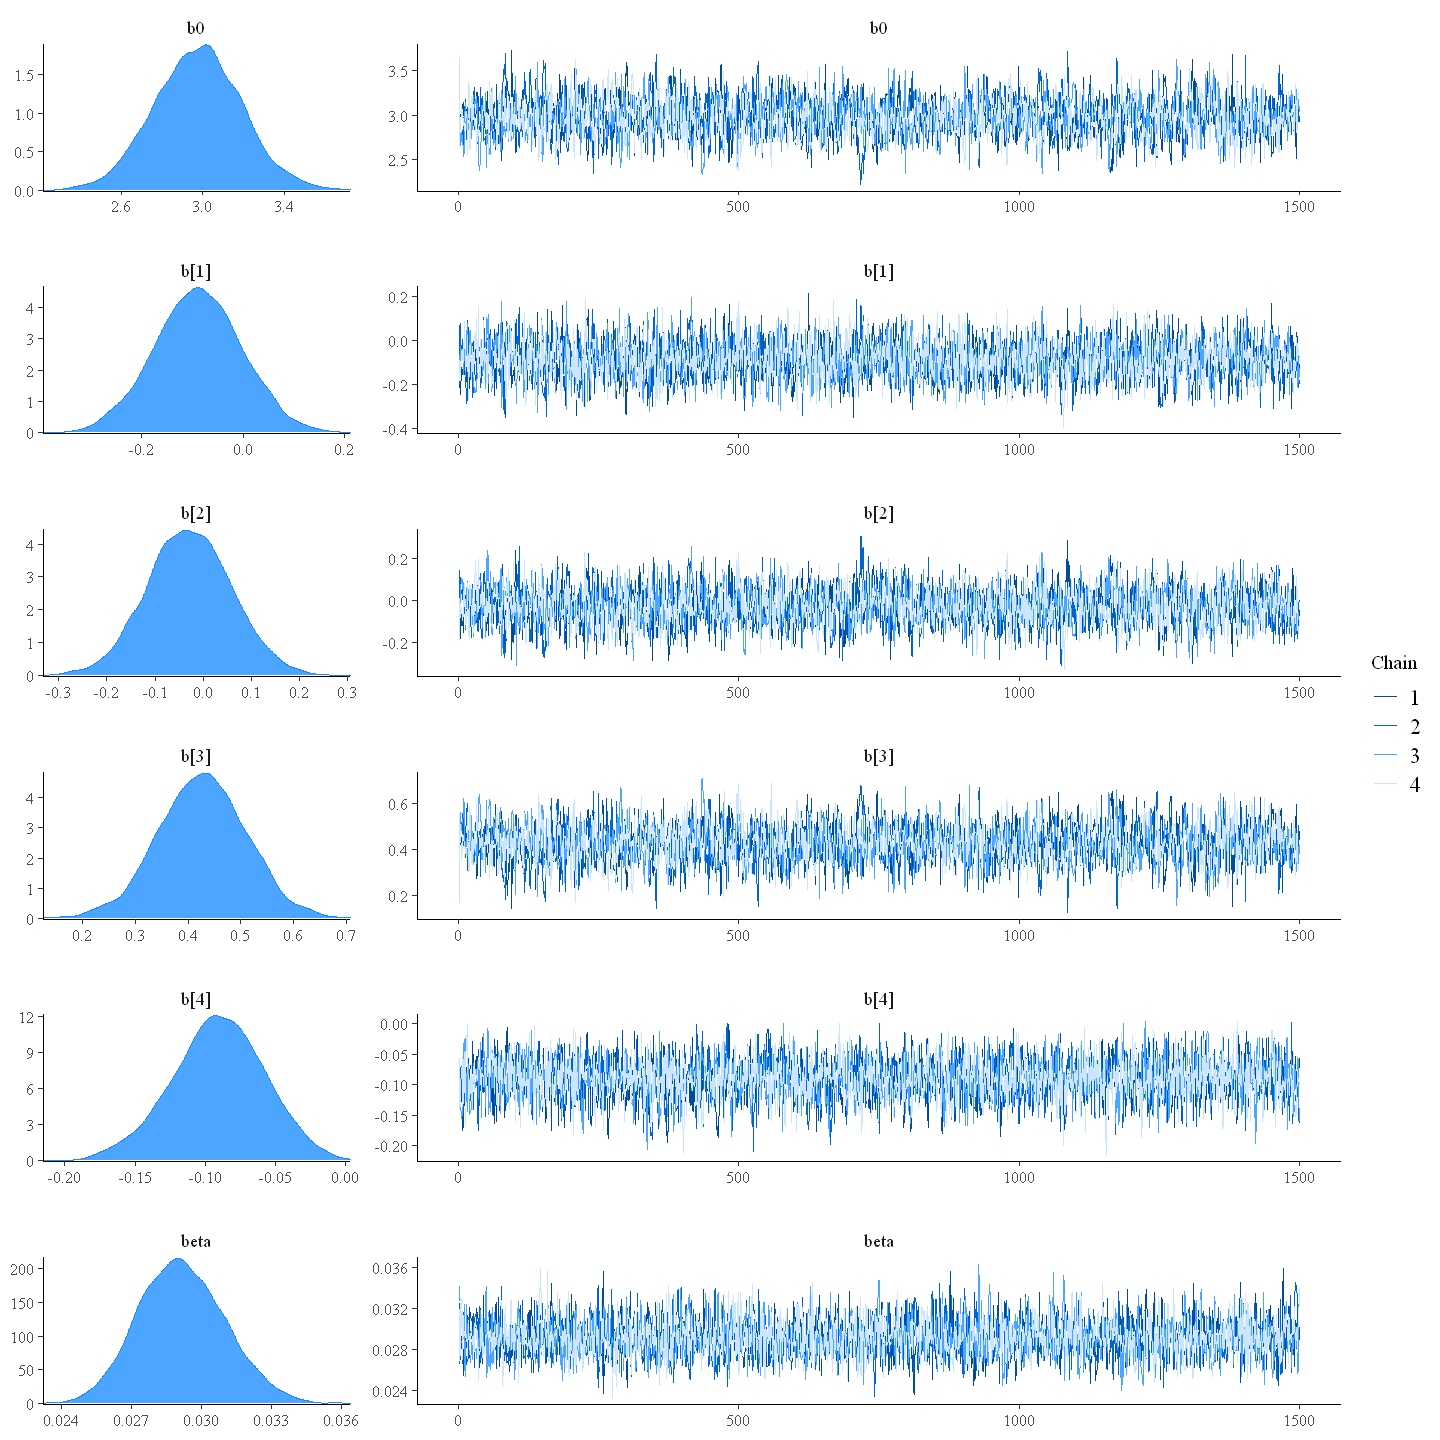

In [40]:
options(repr.plot.width=12,repr.plot.height=12)
mcmc_combo(EqCit.Stan.NB01.a, pars = vars(contains("b")), widths=c(1,3))

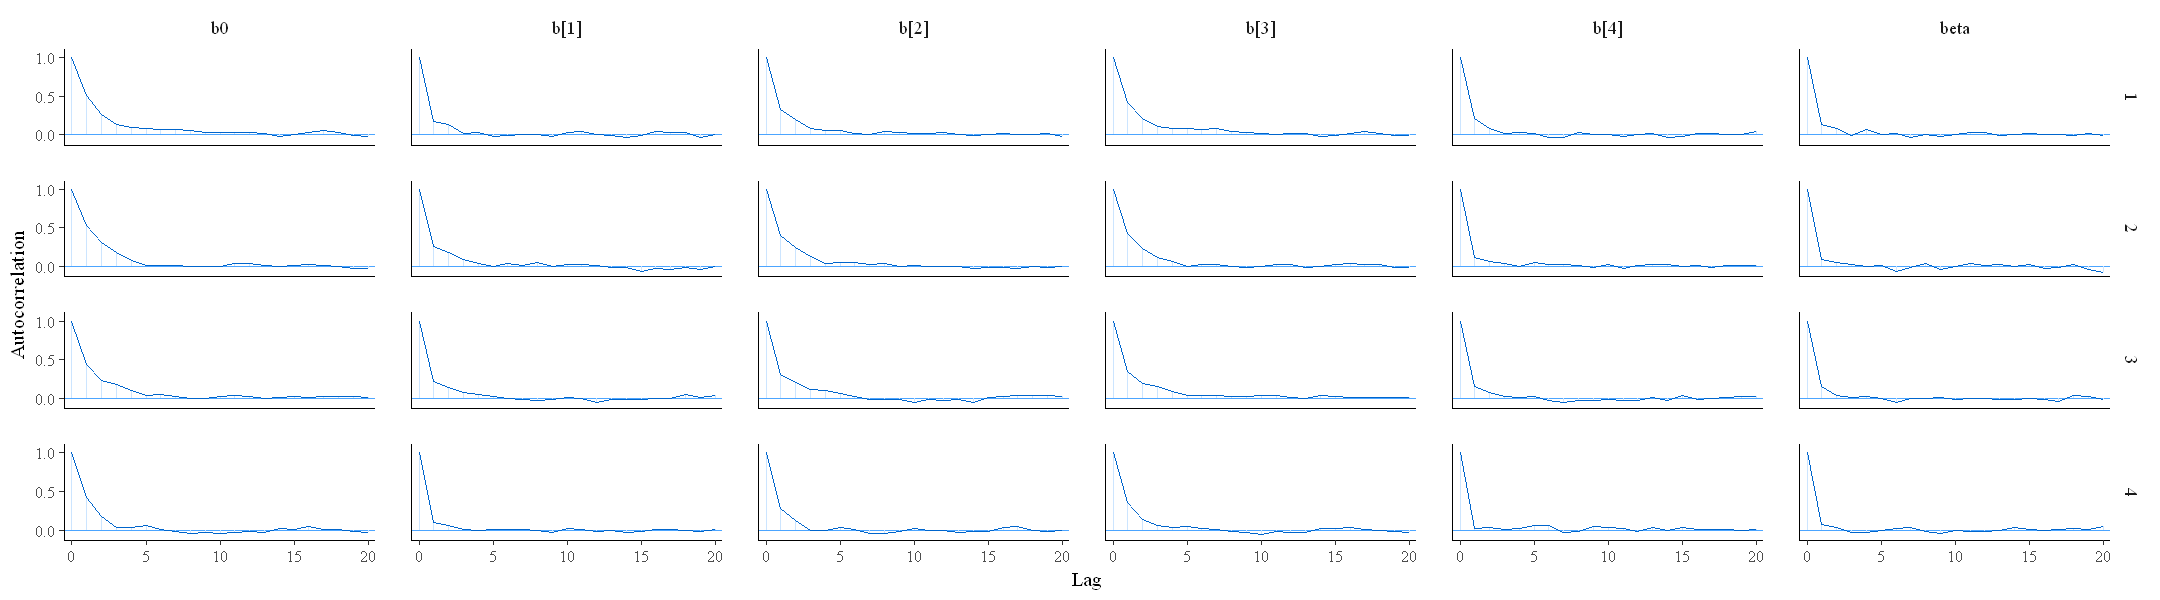

In [41]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(EqCit.Stan.NB01.a, pars = vars(contains("b")))